### **Estimación de precios de autos usados utilizando técnicas de machine learning**

Se utiliza un dataset que contiene información detallada sobre diferentes modelos de autos usados, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos usados basándose en sus características utilizando diferentes modelos de machine learning.


Dataset disponible en: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

### **1. Importación de librerias y dataset**

In [1]:
# librerias 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

In [2]:
# dataset
df = pd.read_csv('vehicles.csv')
df.head(5).T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


### **2. Análisis exploratorio**

In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object


In [5]:
# shape
df.shape

(426880, 26)

In [6]:
# estadisticas del dataset
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


Identificación de valores faltantes, outliers y duplicados.

In [7]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93


El dataset muestra grandes cantidades de valores faltantes, en especial la columna county, en el que el 100% de los datos son nulos. 

Para comprender el dataset, se visualizan los valores unicos en cada columna.

In [8]:
# valores unicos de todas las columnas 
valores_unicos = {col: df[col].unique() for col in df.columns}

# resultados
for columna, unicos in valores_unicos.items():
    print(f"Valores únicos en '{columna}': {unicos}")

Valores únicos en 'id': [7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
Valores únicos en 'url': ['https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html'
 'https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html'
 'https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html'
 ...
 'https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html'
 'https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html']
Valores únicos en 'region': ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery'

In [139]:
# valores duplicados
df.duplicated().sum()

0

A continuacion se visualiza la distribucion de las variables numericas a modo de identifcar que tecnica de imputacion puede utilizarse.

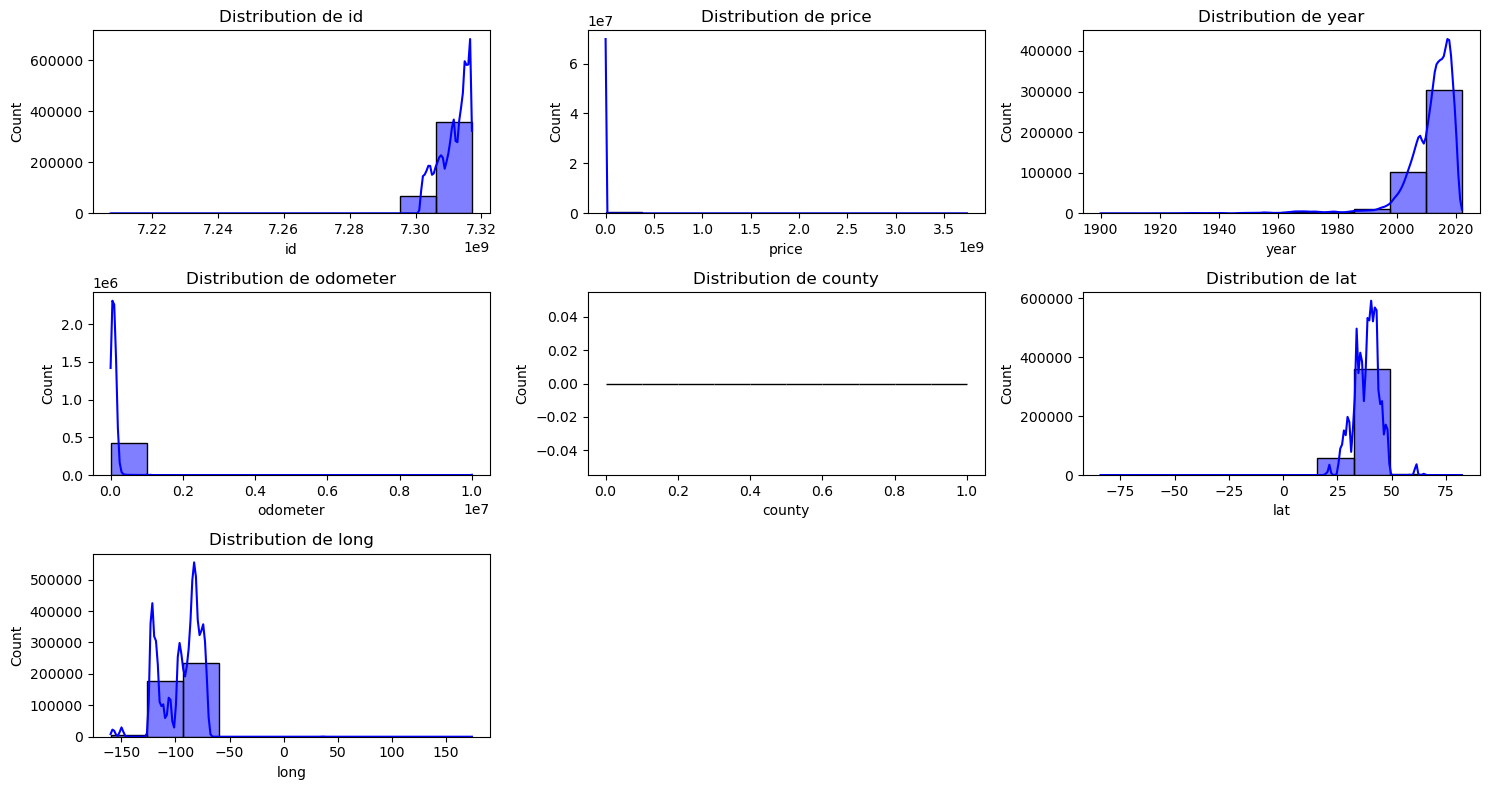

In [9]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Segun la distribucion de los datos en las columnas numericas no siguen una distribucion normal. Ademas, tambien se genera un mapa de calor para visualizar las correlaciones entre variables.

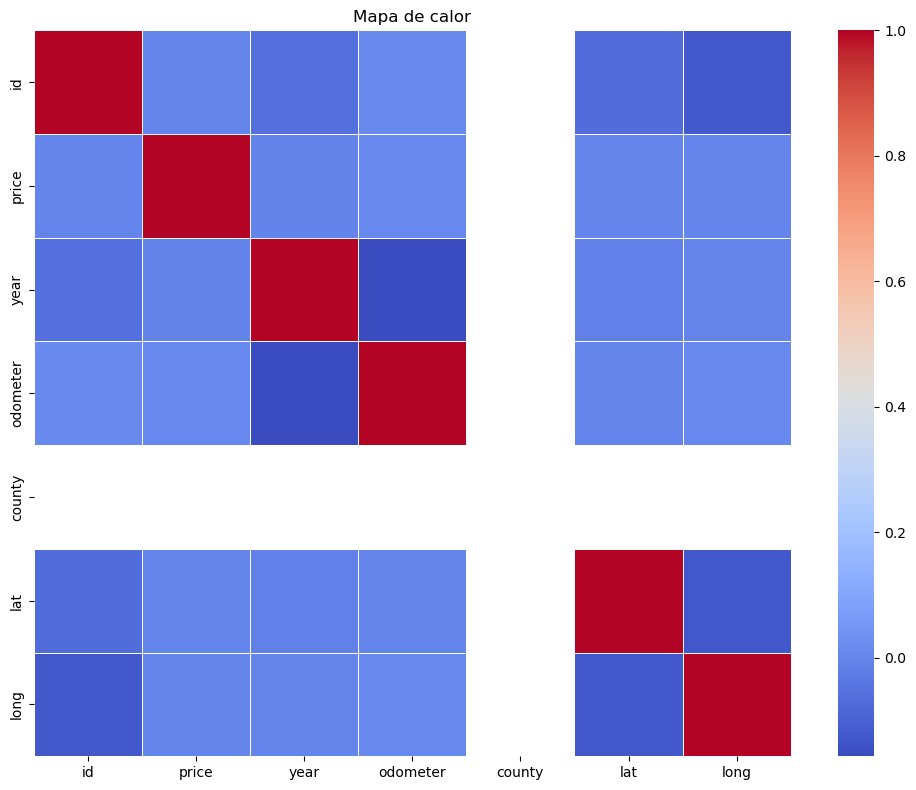

In [10]:
# numericas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

Las correlaciones son debiles, pero se pueden extraer algunas columnas que si representarian relaciones con la prediccion de precios. Se hace una copia del dataset original y se seleccionan features mas importantes.

In [11]:
# copia dataset
df_modified = df 

# eliminar features
df_modified.drop(columns = ['id','url','region_url','region','VIN','image_url','model','description','state', 'lat', 'long','posting_date'],axis = 1,inplace =True)

# resultados
df_modified

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN


In [12]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
odometer,422480,4400,1.03


Dado que la columna county posee el 100% de los datos nulos, se elimina del dataframe

In [13]:
# elimina county
df_modified = df_modified.drop(columns=['county'])

# resultado
df_modified

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


In [14]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
odometer,422480,4400,1.03
fuel,423867,3013,0.71


In [15]:
# tipos de datos
df_modified.dtypes

price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

Visualizar la distribucion de datos de odometer.

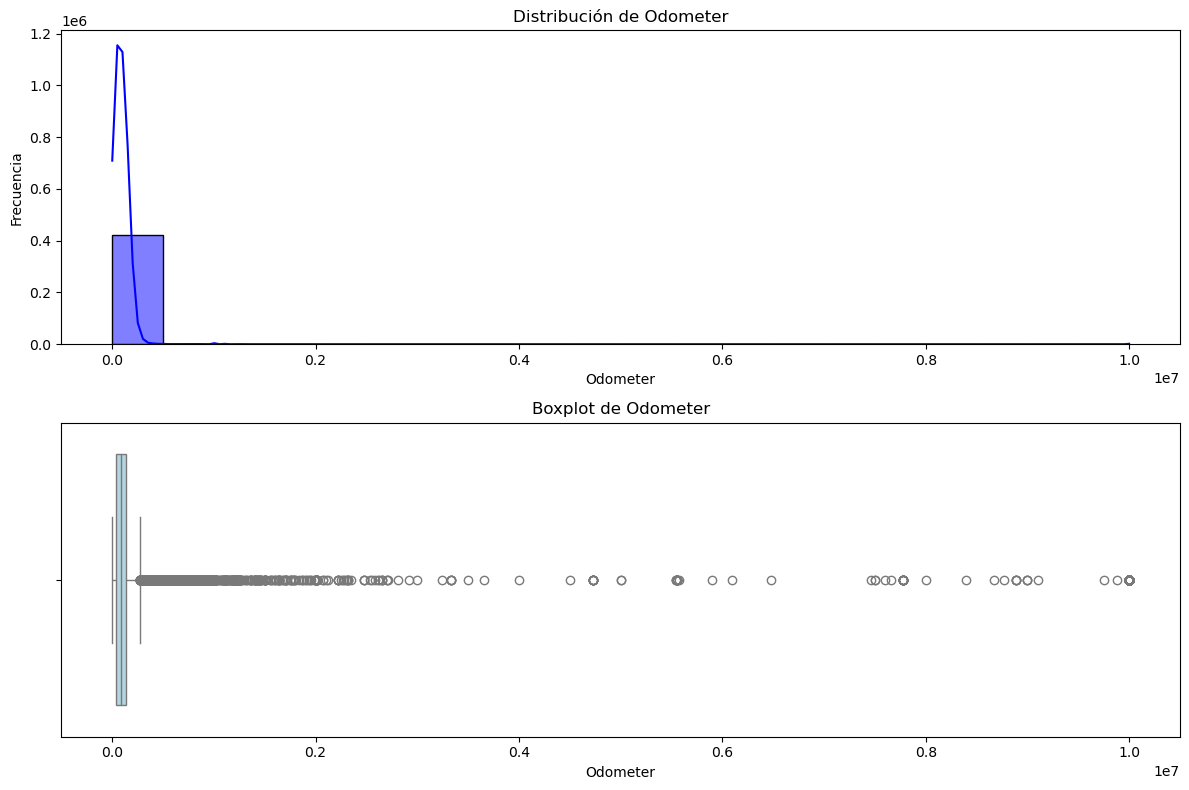

In [16]:
# Crear la figura con subgráficos 
plt.figure(figsize=(12, 8))

# histograma
plt.subplot(2, 1, 1)
sns.histplot(df_modified['odometer'], kde=True, color="blue", bins=20)
plt.title('Distribución de Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frecuencia')

# boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df_modified['odometer'], color="lightblue")
plt.title('Boxplot de Odometer')
plt.xlabel('Odometer')


plt.tight_layout()
plt.show()

In [17]:
# analizar columna odometer
df_modified['odometer'].describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

Los datos faltantes de la columna odometer, se rellenaran con la mediana. Otro punto a considerar es que tiene una gran cantidad de outliers pero se mantendran de esta forma por el momento.

In [18]:
# rellenar valores faltantes con la mediana
df_modified['odometer'].fillna(df_modified['odometer'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9716\2783831851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['odometer'].fillna(df_modified['odometer'].median(), inplace=True)


In [19]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
fuel,423867,3013,0.71
transmission,424324,2556,0.60


Las columnas categoricas con filas de datos faltantes de mas del 20% seran eliminadas.

In [20]:
# porcentaje de faltantes
missing_percentage = df_modified.isna().mean() * 100

# filtrar con mas del 20% de na
columns_to_drop = missing_percentage[missing_percentage > 20].index

# eliminar
df_modified = df_modified.dropna(subset=columns_to_drop)

In [21]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
manufacturer,80589,4062,4.80
transmission,84640,11,0.01
price,84651,0,0.00
year,84651,0,0.00
condition,84651,0,0.00
cylinders,84651,0,0.00
fuel,84651,0,0.00
odometer,84651,0,0.00
title_status,84651,0,0.00
drive,84651,0,0.00


Manufacturer sera rellenado con la moda

In [22]:
# rellenar faltantes con la moda
df_modified.loc[:, 'manufacturer'] = df_modified['manufacturer'].fillna(df_modified['manufacturer'].mode()[0])

# revisar 
df_modified['manufacturer'].unique()

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'chevrolet',
       'jeep', 'lexus', 'bmw', 'gmc', 'mercedes-benz', 'mazda', 'rover',
       'ram', 'nissan', 'ferrari', 'audi', 'mitsubishi', 'infiniti',
       'volkswagen', 'kia', 'hyundai', 'fiat', 'acura', 'cadillac',
       'lincoln', 'jaguar', 'saturn', 'volvo', 'alfa-romeo', 'buick',
       'subaru', 'mini', 'pontiac', 'porsche', 'harley-davidson', 'tesla',
       'mercury', 'datsun', 'land rover', 'aston-martin'], dtype=object)

In [23]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
transmission,84640,11,0.01
price,84651,0,0.00
year,84651,0,0.00
manufacturer,84651,0,0.00
condition,84651,0,0.00
cylinders,84651,0,0.00
fuel,84651,0,0.00
odometer,84651,0,0.00
title_status,84651,0,0.00
drive,84651,0,0.00


Se borran los NA restantes.

In [24]:
# borrar transmission
df_modified = df_modified.dropna(subset=['transmission'])

In [25]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
price,84640,0,0.0
year,84640,0,0.0
manufacturer,84640,0,0.0
condition,84640,0,0.0
cylinders,84640,0,0.0
fuel,84640,0,0.0
odometer,84640,0,0.0
title_status,84640,0,0.0
transmission,84640,0,0.0
drive,84640,0,0.0


In [26]:
# datos 
df_modified.dtypes

price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

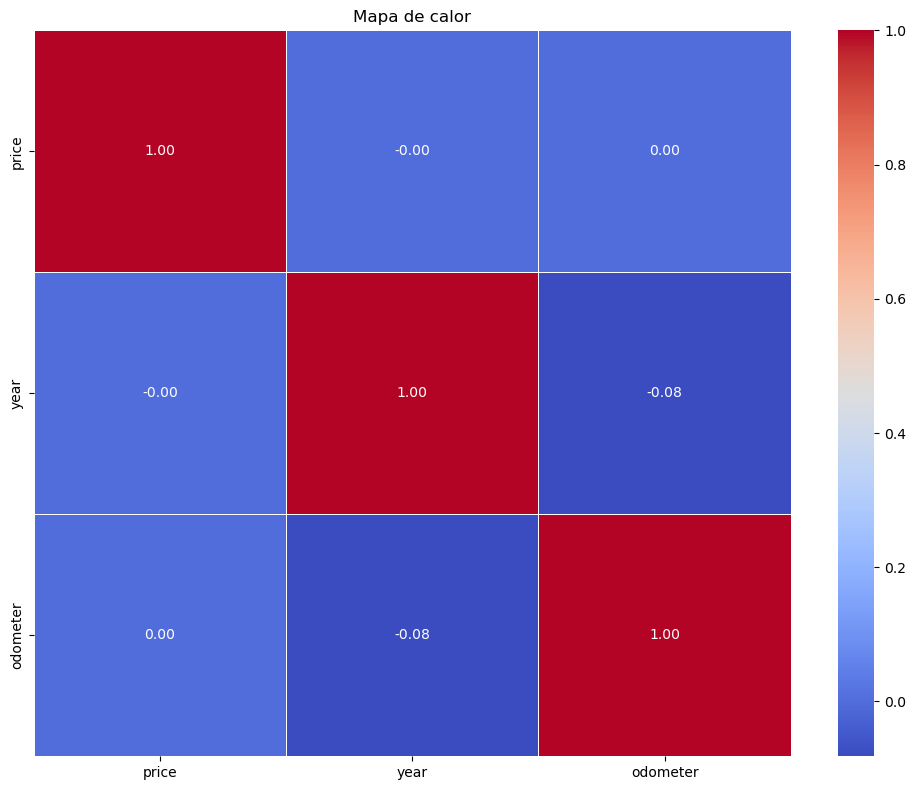

In [28]:
# variables numéricas
numerical_columns = df_modified.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

In [29]:
# estadisticas
df_modified.describe()

,price,year,odometer
count,8.464000e+04,84640.000000,8.464000e+04
mean,7.624527e+04,2007.921763,1.253019e+05
std,1.342242e+07,10.987688,2.557677e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.916000e+03,2005.000000,7.264850e+04
50%,9.000000e+03,2010.000000,1.130000e+05
75%,1.790000e+04,2014.000000,1.552850e+05
max,3.736929e+09,2022.000000,1.000000e+07


Se busca analizar la distribucion y outliers de price. Como los valores son grandes, se utiliza escala logaritmica.

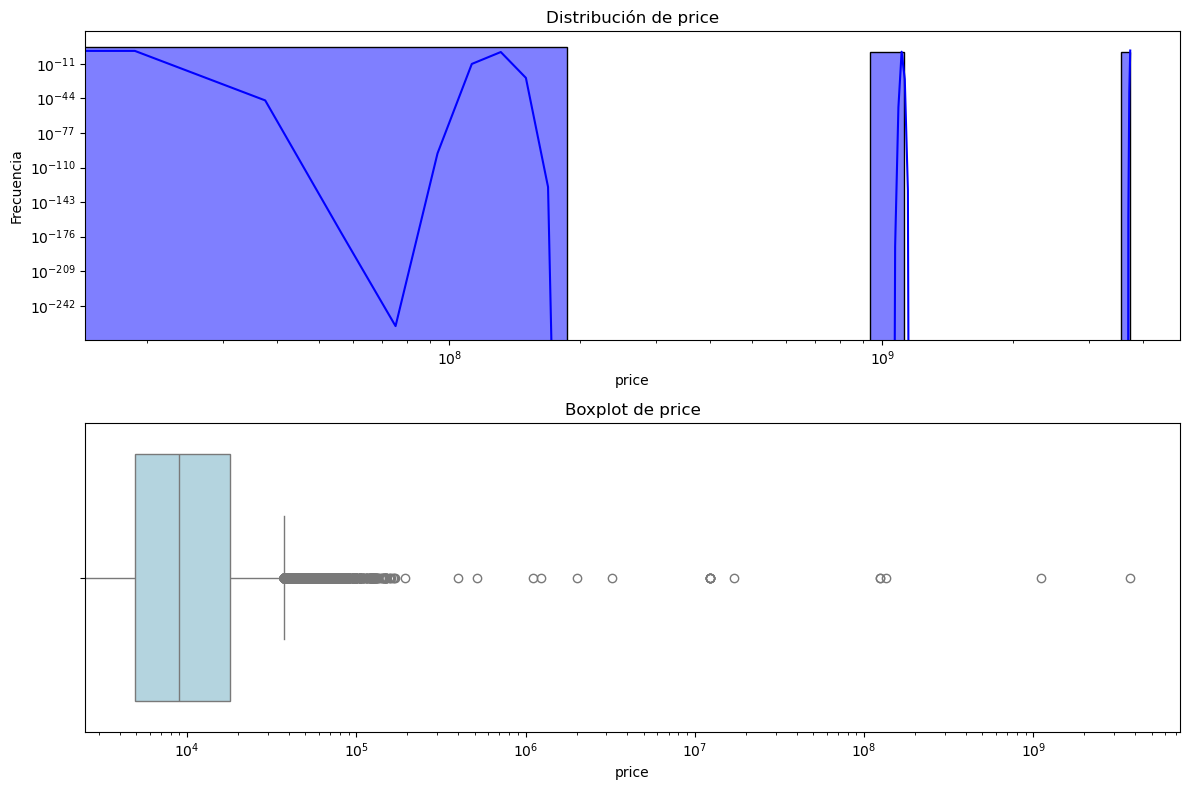

In [30]:
# Crear la figura con subgráficos 
plt.figure(figsize=(12, 8))

# histograma
plt.subplot(2, 1, 1)
sns.histplot(df_modified['price'], kde=True, color="blue", bins=20)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de price')
plt.xlabel('price')
plt.ylabel('Frecuencia')

# boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df_modified['price'], color="lightblue")
plt.xscale('log')
plt.title('Boxplot de price')
plt.xlabel('price')

plt.tight_layout()
plt.show()

In [31]:
# estadisticas de price
df_modified['price'].describe()

count    8.464000e+04
mean     7.624527e+04
std      1.342242e+07
min      0.000000e+00
25%      4.916000e+03
50%      9.000000e+03
75%      1.790000e+04
max      3.736929e+09
Name: price, dtype: float64

Se aplica logaritmo para buscar mejores resultados sobre la columna price.

In [32]:
# valores grandes de price, aplicar logaritmo
df_modified['price'] = df_modified['price'].replace(0, np.nan)
df_modified['price'] = np.log1p(df_modified['price'])  

# estadisticas
print(df_modified['price'].describe())

count    80955.000000
mean         9.074549
std          1.307578
min          0.693147
25%          8.610866
50%          9.190240
75%          9.798183
max         22.041530
Name: price, dtype: float64


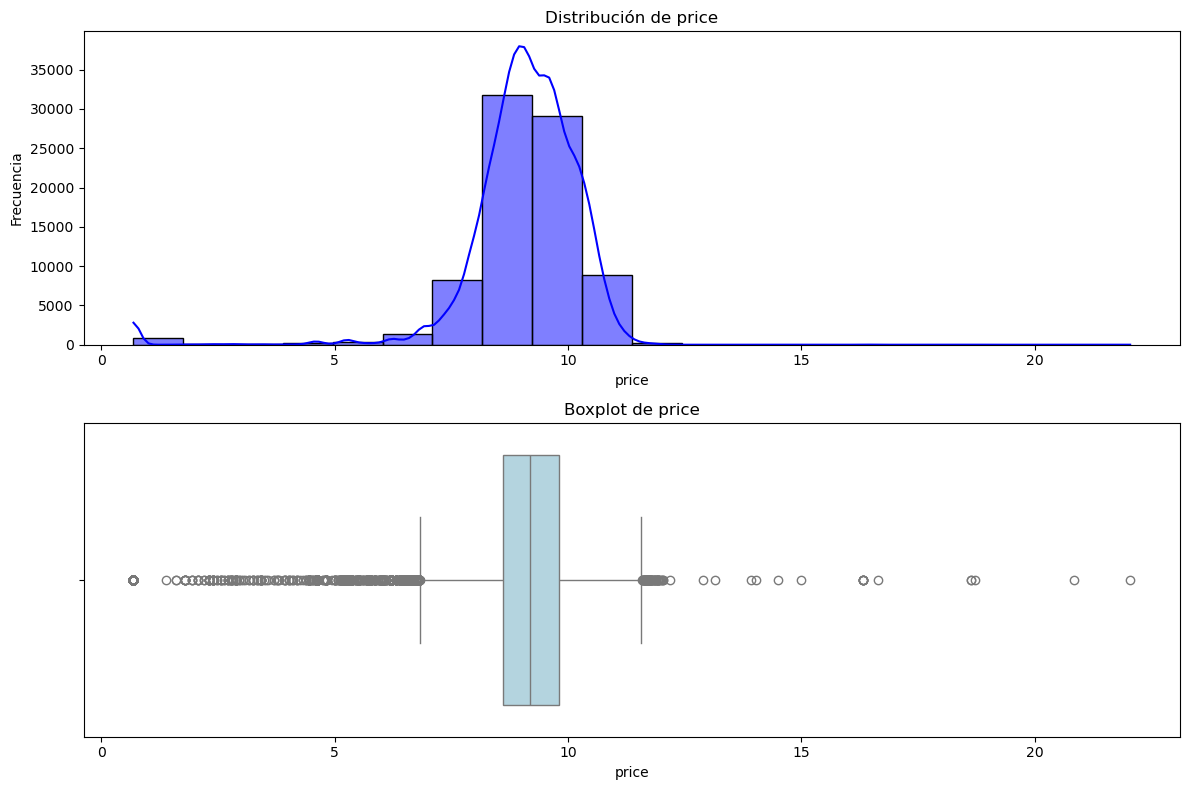

In [33]:
# Crear la figura con subgráficos 
plt.figure(figsize=(12, 8))

# histograma
plt.subplot(2, 1, 1)
sns.histplot(df_modified['price'], kde=True, color="blue", bins=20)
plt.title('Distribución de price')
plt.xlabel('price')
plt.ylabel('Frecuencia')

# boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df_modified['price'], color="lightblue")
plt.title('Boxplot de price')
plt.xlabel('price')

plt.tight_layout()
plt.show()

Price sigue una distribucion normal con muchos outliers.

In [34]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
price,80955,3685,4.35
year,84640,0,0.00
manufacturer,84640,0,0.00
condition,84640,0,0.00
cylinders,84640,0,0.00
fuel,84640,0,0.00
odometer,84640,0,0.00
title_status,84640,0,0.00
transmission,84640,0,0.00
drive,84640,0,0.00


In [35]:
# borrar price con faltantes
df_modified = df_modified.dropna(subset=['price'])

In [36]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df_modified.shape[0]-df_modified.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df_modified.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df_modified.isnull().sum(axis=0)/df_modified.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
price,80955,0,0.0
year,80955,0,0.0
manufacturer,80955,0,0.0
condition,80955,0,0.0
cylinders,80955,0,0.0
fuel,80955,0,0.0
odometer,80955,0,0.0
title_status,80955,0,0.0
transmission,80955,0,0.0
drive,80955,0,0.0


### **3. Preprocesamiento de los datos**

Se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) y se realiza un preprocesamiento.

In [37]:
# definicion de variables categoricas y target
x = df_modified.drop(columns=['price'])
y = df_modified[['price']]

In [38]:
# verificacion 
print("Variable target dimensiones" , y.shape)
print("Variables predictoras dimensiones" , x.shape)

Variable target dimensiones (80955, 1)
Variables predictoras dimensiones (80955, 12)


Separar los datos en train y test 

In [39]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

A continuacion se extraen las columnas categorias y numericas en variables distintas para aplicarles luego las transformaciones correspondientes.

In [40]:
# separar en columnas categoricas y numericas
numerical_features = [col for col in x_train.select_dtypes(include=['int64', 'float64']).columns if col != 'price']

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_features)
print(numerical_features)

['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
['year', 'odometer']


Debido a la presencia de outliers, se opta como mecanismo de escalamiento al robust scaler

In [41]:
# escalamiento de los datos
scaler = RobustScaler()

In [42]:
# procesar las columnas numéricas
# fit transform para train
x_train_num = scaler.fit_transform(x_train[numerical_features])

# transform para test
x_test_num = scaler.transform(x_test[numerical_features])

Para las variables categoricas se utiliza el one hot encoder

In [43]:
# encoder para datos categoricos
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=True)

In [44]:
# procesar las columnas categoricas
# fit transform para train
x_train_cat = encoder.fit_transform(x_train[categorical_features])

# transform para test
x_test_cat = encoder.transform(x_test[categorical_features])

Se combinan ambas columnas procesadas.

In [45]:
# combinar matrices numéricas y categóricas
x_train_processed = hstack([x_train_num, x_train_cat])
x_test_processed = hstack([x_test_num, x_test_cat])

### 4. **Aplicación de modelos**

### **Modelo de regresión**

A continuacion se aplica el modelo de regresion al conjunto de train y luego se evaluan las metricas.

In [46]:
# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_processed, y_train)

LinearRegression()

In [47]:
# hacer predicciones utilizando los datos procesados
y_train_pred = model.predict(x_train_processed)
y_test_pred = model.predict(x_test_processed)

In [48]:
# imprimir las predicciones 
print("Predicciones:", y_test_pred[:5])

Predicciones: [[8.90078522]
 [9.19091208]
 [9.75807586]
 [7.91447523]
 [8.65207776]]


In [49]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 0.6105431722878588
Error cuadrático medio (MSE): 1.107644893174688
Coeficiente de determinación (R²): 0.3339700536256245


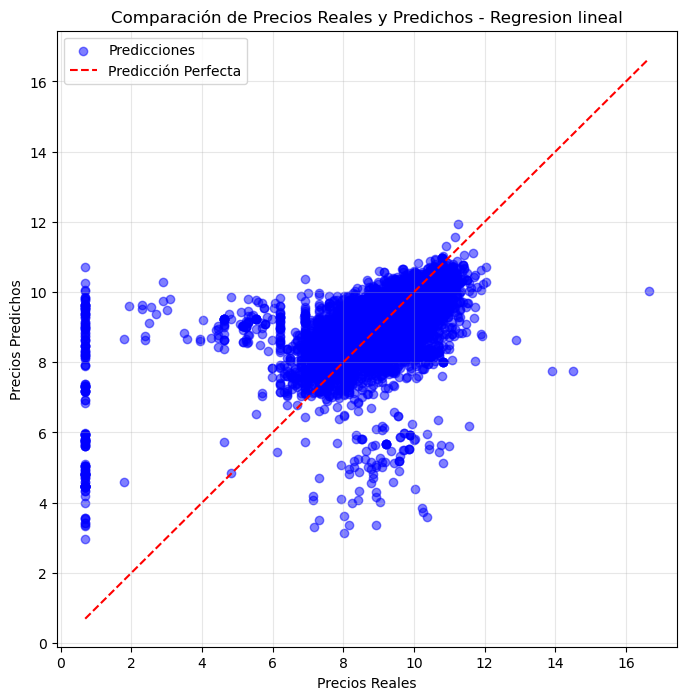

In [50]:
# convertir las series a una dimension
y_test = np.ravel(y_test)
y_test_pred = np.ravel(y_test_pred)

# gráfico
plt.figure(figsize=(8, 8))

# valores reales vs predichos
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicciones')

# línea de referencia de predicción perfecta (predicho = real)
max_value = max(max(y_test), max(y_test_pred))
min_value = min(min(y_test), min(y_test_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Predicción Perfecta')

# configurar gráfico
plt.title('Comparación de Precios Reales y Predichos - Regresion lineal')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.legend()
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()

En cuanto al modelo de regresion se observa que las metricas muestra un resultado deficiente, con r2 de solo 0.33.

### **Decission trees**

Se adapta el flujo para aplicar arboles de decision 

In [51]:
# ajustar modelo
tree_model = DecisionTreeRegressor(random_state=0, max_depth=14) 
tree_model.fit(x_train_processed, y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [52]:
# predicciones
y_train_pred = tree_model.predict(x_train_processed)
y_test_pred = tree_model.predict(x_test_processed)

In [53]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 0.373925259483757
Error cuadrático medio (MSE): 0.6098891521793292
Coeficiente de determinación (R²): 0.6332719612365432


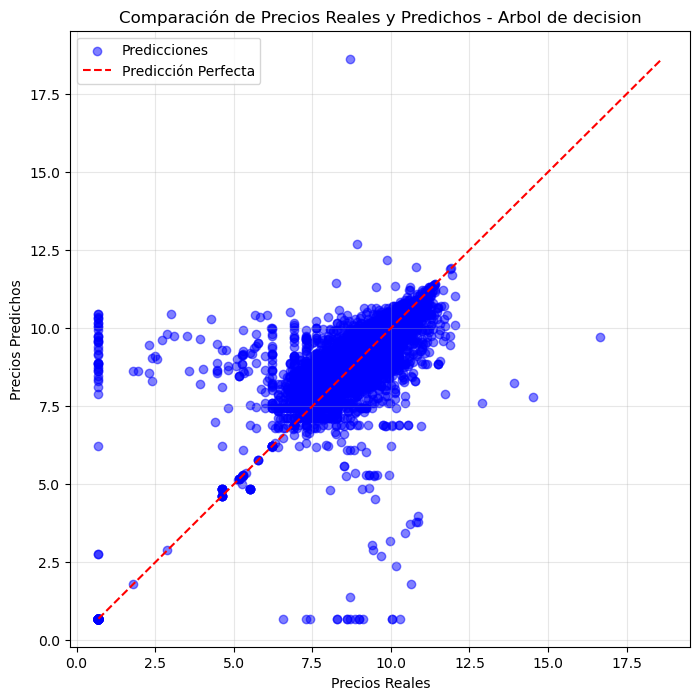

In [54]:
# convertir las series a una dimension
y_test = np.ravel(y_test)
y_test_pred = np.ravel(y_test_pred)

# gráfico
plt.figure(figsize=(8, 8))

# valores reales vs predichos
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicciones')

# línea de referencia de predicción perfecta (predicho = real)
max_value = max(max(y_test), max(y_test_pred))
min_value = min(min(y_test), min(y_test_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Predicción Perfecta')

# configurar gráfico
plt.title('Comparación de Precios Reales y Predichos - Arbol de decision')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.legend()
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()


En cuanto al modelo de arboles de decision la performance, con r2 0.63.

### **Decission trees con GridSearchCV**

A continuacion se procede a aplicar GridSearchCV para mejorar el modelo de arboles de decision

In [55]:
# modelo
tree_model_grid = DecisionTreeRegressor(random_state=0)

In [56]:
# espacio de búsqueda de hiperparámetros
param_grid = {
    # profundidad maxima del arbol
    'max_depth': [5, 10, 14, 20, None], 
    # minimo numero de muestras para dividir un nodo
    'min_samples_split': [2, 5, 10, 20], 
    # minimo numero de muestras para hoja
    'min_samples_leaf': [1, 2, 5, 10],  
    # maximo de caracteristicas a considerar
    'max_features': [None, 'sqrt', 'log2']  
}

In [57]:
# configurar gridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    # métrica de evaluación
    scoring='r2',  
    # divisiones para validación cruzada
    cv=5,  
    # mostrar progreso durante el ajuste
    verbose=1,  
    # usar todos los núcleos disponibles
    n_jobs=-1  
)

In [58]:
# ajustar con los datos de entrenamiento
grid_search.fit(x_train_processed, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=14, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 14, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=1)

In [ ]:
# mejores hiperparametros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# ajustar 
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test_processed)

In [61]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 0.37563746576751605
Error cuadrático medio (MSE): 0.5550660112102648
Coeficiente de determinación (R²): 0.6662372679559614


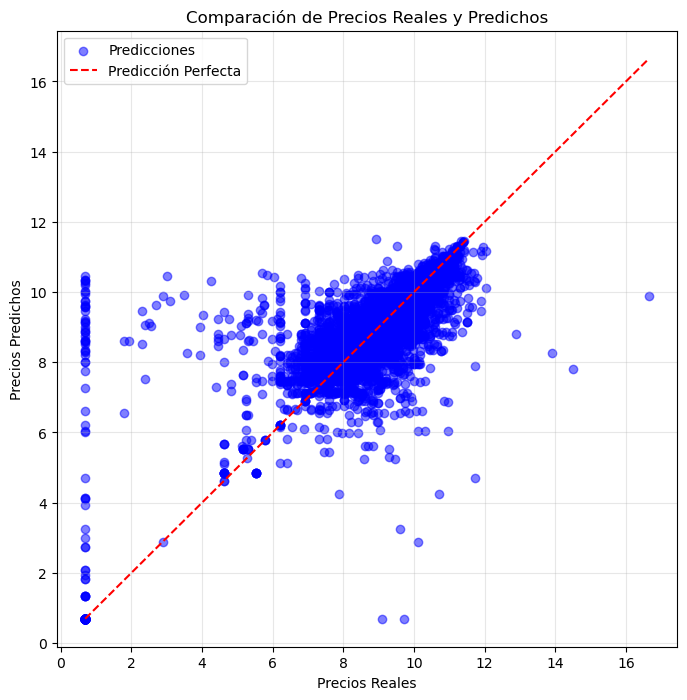

In [63]:
# convertir las series a 1d
y_test = np.ravel(y_test)
y_test_pred = np.ravel(y_test_pred)

# grafico
plt.figure(figsize=(8, 8))

# reales vs predichos
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicciones')

# referencia
max_value = max(max(y_test), max(y_test_pred))
min_value = min(min(y_test), min(y_test_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Predicción Perfecta')

# grafico
plt.title('Comparación de Precios Reales y Predichos')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.legend()
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()


Aplicando el grid search CV se aumenta el rendimiento del modelo de arboles de decision, alcanzando un r2 de 0.66. En la imagen se observa una linea roja que representa a las predicciones perfectas, es decir el caso en el que el valor predicho es igual al valor real, mientras mas cerca los puntos azules se encuentren de la linea roja significa que se tiene una buena prediccion. Por otro lado, a partir del grafico se puede concluir que el modelo realiza buenas predicciones pero tiene problemas con los valores que son cercanos a 0.